# Решающее дерево в задаче классификации

In [2]:
from IPython.display import HTML

HTML(data="""<iframe width="854" height="480" 
    src="https://www.youtube.com/embed/p17C9q2M00Q" 
            frameborder="0" allowfullscreen></iframe>""")

In [6]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<center><img src='../imgs/iris_petal_sepal.png' width=400>
Датасет цветов ириса


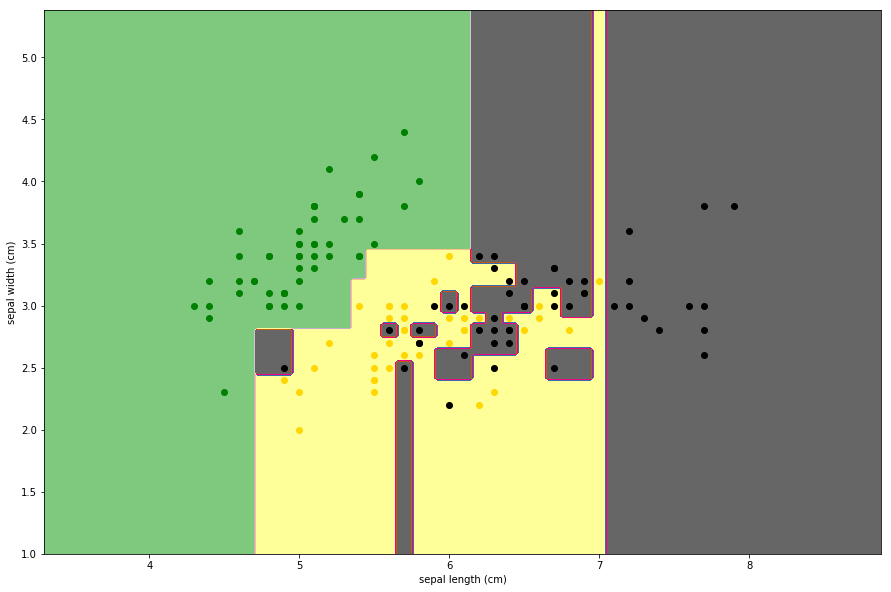

In [47]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

max_leaf_nodes = 100

# Load data
iris = load_iris()
features = [0,1]

# We only take the two corresponding features
X = iris.data[:, features]
y = iris.target

# Train
clf = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42).fit(X, y)

# X_test:
plot_step = 0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Predict
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Boring plotting stuff
plt.figure(figsize=(15, 10))
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[features[0]])
plt.ylabel(iris.feature_names[features[1]])

# Plot the training points
for i, color in zip([0, 1, 2], ['g', 'gold', 'black']):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                label=iris.target_names[i])
plt.axis("tight");

## Дерево можно нарисовать:

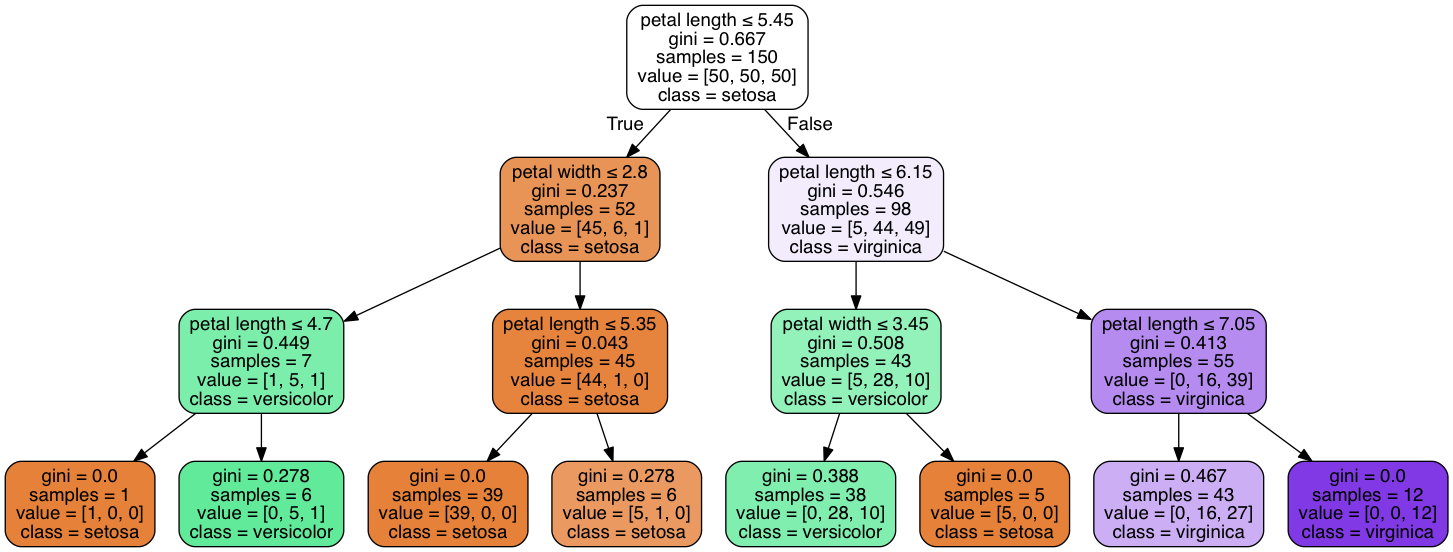

In [48]:
import pydotplus 
from IPython.display import Image
from sklearn import tree

pair = [0, 1]
X = iris.data[:, pair]
y = iris.target

clf = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X, y)  # сказать про min_samples_split

dot_data = tree.export_graphviz(clf, out_file=None, 
                                 feature_names=['petal length', 
                                                'petal width'],  
                                 class_names=iris.target_names,  
                                 filled=True, rounded=True,
                                 special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

## Какие бывают критерии информативности?

<img src='../imgs/dt_crit0.jpg'>
<img src='../imgs/dt_crit1.jpg'>
<img src='../imgs/dt_crit2.jpg'>
<img src='../imgs/dt_crit3.jpg'>
<img src='../imgs/Sem3_trees.pdf 2018-07-27 17-22-28.png'>
<img src='../imgs/Sem3_trees.pdf 2018-07-27 17-21-00.png'>

## Ссылки:
- Интуитивное понятие энтропии: https://www.youtube.com/watch?v=2s3aJfRr9gE&t=1s
- Слайды Евгения Соколова: http://www.machinelearning.ru/wiki/images/8/89/Sem3_trees.pdf . Очень полезно порешать аналитические задачи, чтобы осознать, что такое критерий Джини и энтропийный критерий.
- Статья <a href="https://habrahabr.ru/company/ods/blog/322534/">по деревьям в классификации от ODS</a>
- Статья <a href="http://habrahabr.ru/post/171759/">"Энтропия и деревья принятия решений"</a>  на Хабрахабре
- Википедия <a href="https://en.wikipedia.org/wiki/Decision_tree_learning">"Decision tree learning"</a>
- <a href="http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart">Различия разных подходов к построению дерева</a>. Самое важное: "scikit-learn uses an optimised version of the CART algorithm".
- <a href="http://cis-linux1.temple.edu/~giorgio/cis587/readings/id3-c45.html">Статья</a> "Building Classification Models: ID3 and C4.5" 
- Use Case: Дерево решений (<a href="http://www.nytimes.com/imagepages/2008/04/16/us/20080416_OBAMA_GRAPHIC.html">нарисовано</a>) для предсказания итогов выборов президента США (когда Барак Обама победил Хилари Клинтон)